In [39]:
# Importing the required libraries

import pandas as pd
import numpy as np
import os 
import ast
from collections import defaultdict


In [40]:
# opening the dataset
df= pd.read_csv("tmdb.movies.csv", index_col=0)


In [41]:
#Looking at the first five of the dataset
df.head(10)

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
5,"[12, 14, 10751]",32657,en,Percy Jackson & the Olympians: The Lightning T...,26.691,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229
6,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676
7,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340
8,"[16, 10751, 35]",20352,en,Despicable Me,23.673,2010-07-09,Despicable Me,7.2,10057
9,"[16, 28, 35, 10751, 878]",38055,en,Megamind,22.855,2010-11-04,Megamind,6.8,3635


In [42]:
#Looking at the last five of the dataset
df.tail(5)

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
26512,"[27, 18]",488143,en,Laboratory Conditions,0.6,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.6,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",381231,en,The Last One,0.6,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.6,2018-06-22,Trailer Made,0.0,1
26516,"[53, 27]",309885,en,The Church,0.6,2018-10-05,The Church,0.0,1


In [43]:
#Looking at the shape of rows and colums of the dataset
df.shape

(26517, 9)

In [44]:
#Looking at the information in rows and colums of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


In [45]:
#Looking at the descriptive stats of the dataset
df.describe()

,id,popularity,vote_average,vote_count
count,26517.000000,26517.000000,26517.000000,26517.000000
mean,295050.153260,3.130912,5.991281,194.224837
std,153661.615648,4.355229,1.852946,960.961095
min,27.000000,0.600000,0.000000,1.000000
25%,157851.000000,0.600000,5.000000,2.000000
50%,309581.000000,1.374000,6.000000,5.000000
75%,419542.000000,3.694000,7.000000,28.000000
max,608444.000000,80.773000,10.000000,22186.000000


In [46]:
#checking for missing values
missing_values=df.isna()
missing_values

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
26512,False,False,False,False,False,False,False,False,False
26513,False,False,False,False,False,False,False,False,False
26514,False,False,False,False,False,False,False,False,False
26515,False,False,False,False,False,False,False,False,False


In [47]:
df.isna().sum()

genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [48]:
duplicatte_rows=[df.duplicated()]
duplicatte_rows

[0        False
 1        False
 2        False
 3        False
 4        False
          ...  
 26512    False
 26513    False
 26514    False
 26515    False
 26516    False
 Length: 26517, dtype: bool]

In [49]:
#creating a data frame of Genre_id and Genre_name as per the codes from 
genre_names = pd.DataFrame({"Genre_id ": [28, 12, 16, 35,80, 99, 18, 10751, 14,36, 27, 10402, 9648, 10749, 878, 10770, 53, 10752, 37], "Genre_name" : ['Action   ', 'Adventure    ', 'Animation  ', 'Comedy     ', 'Crime       ', 'Documentary  ', 'Drama      ', 'Family       ', 'Fantasy    ', 'History     ', 'Horror       ', 'Music         ', 'Mystery ', 'Romance        ', 'Science_Fiction ', 'TV_Movie ', 'Thriller', 'War ', 'Western '
]})
genre_names

,Genre_id,Genre_name
0,28,Action
1,12,Adventure
2,16,Animation
3,35,Comedy
4,80,Crime
5,99,Documentary
6,18,Drama
7,10751,Family
8,14,Fantasy
9,36,History


In [50]:
# Converting the genres ids column from a list of string to a list of integers

df['genre_ids'] = df['genre_ids'].apply(ast.literal_eval)

In [51]:
#Grouping data by genre and calculating total vote count

genre_vote_counts = defaultdict(int)
for index, row in df.iterrows():
    for genre_id in row['genre_ids']:
        genre_vote_counts[genre_id] += row['vote_count']

In [52]:
# Finding the genre with the highest vote count

most_watched_genre_id = max(genre_vote_counts, key=genre_vote_counts.get)

print(f"The most watched/preferred genre is which has genre_id : {most_watched_genre_id} with a total vote count of {genre_vote_counts[most_watched_genre_id]}.")

The most watched/preferred genre is which has genre_id : 18 with a total vote count of 2064637.


In [53]:
# Finding the genre with the least vote count
Least_watched_genre_id = min(genre_vote_counts, key=genre_vote_counts.get)

print(f"The least watched/preferred genre is which has genre_id : {Least_watched_genre_id} with a total vote count of {genre_vote_counts[most_watched_genre_id]}.")

The least watched/preferred genre is which has genre_id : 10770 with a total vote count of 2064637.


In [54]:
genre_names.columns

Index(['Genre_id ', 'Genre_name'], dtype='object')

In [55]:
genre_names.set_index('Genre_id ', inplace = True)

In [56]:
#adding a new column with counts
updated_genre_names_df= genre_names.assign(Counts=genre_vote_counts)
updated_genre_names_df

,Genre_name,Counts
Genre_id,,
28,Action,1912290
12,Adventure,1645828
16,Animation,506612
35,Comedy,1403883
80,Crime,632691
99,Documentary,62283
18,Drama,2064637
10751,Family,652585
14,Fantasy,902816


In [57]:
genre_names.columns

Index(['Genre_name'], dtype='object')

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

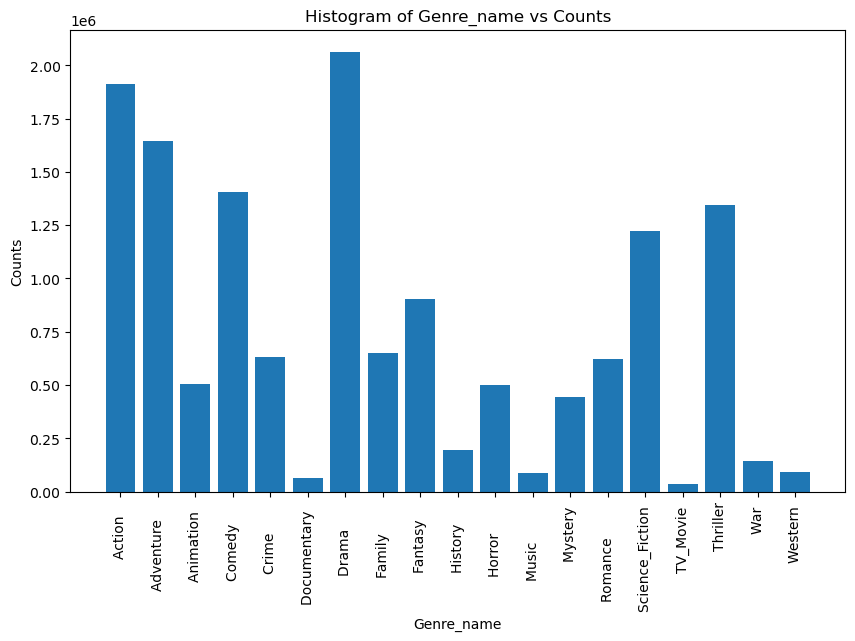

In [59]:
#Bargraph of Genre and Counts
genre_name = updated_genre_names_df['Genre_name']
counts = updated_genre_names_df['Counts']

plt.figure(figsize=(10,6))
plt.bar(genre_name, counts)
plt.xlabel('Genre_name')
plt.ylabel('Counts')
plt.title('Histogram of Genre_name vs Counts')
plt.xticks(rotation=90)
plt.show()

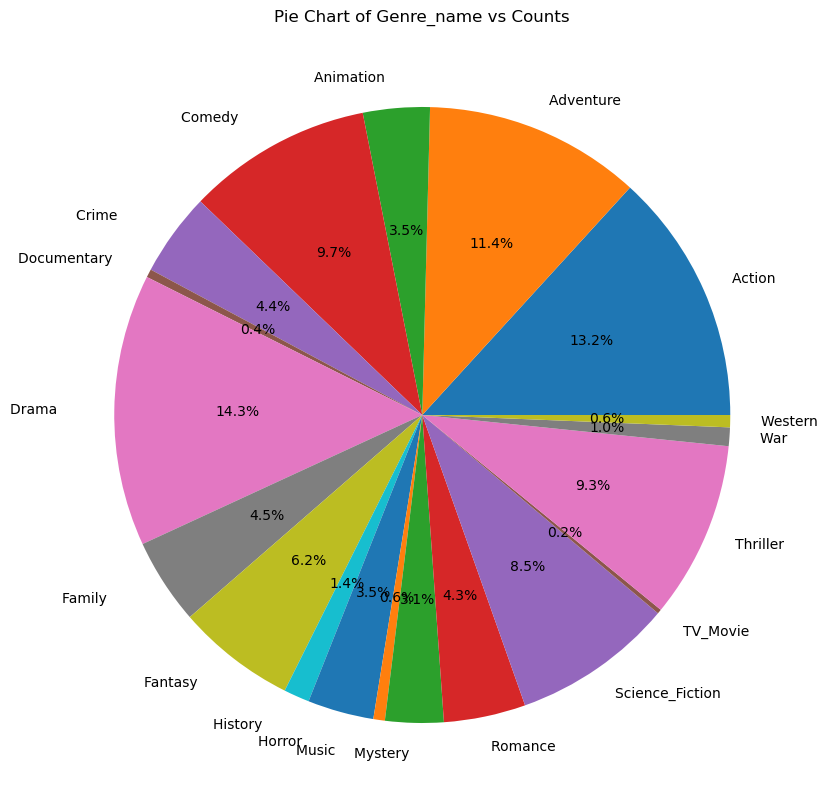

In [60]:
#Visual representation with a Pie chart
plt.figure(figsize=(10,10))
plt.pie(counts, labels = genre_name, autopct='%1.1f%%')
plt.title('Pie Chart of Genre_name vs Counts')
plt.show()

In [61]:
sorted_data = updated_genre_names_df.sort_values(by='Counts', ascending=False)
sorted_data

,Genre_name,Counts
Genre_id,,
18,Drama,2064637
28,Action,1912290
12,Adventure,1645828
35,Comedy,1403883
53,Thriller,1342877
878,Science_Fiction,1222644
14,Fantasy,902816
10751,Family,652585
80,Crime,632691
